In [2]:
import subprocess as sp
import networkx as nx
import matplotlib.pyplot as plt


import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import neuraltda.simpComp as sc
import numpy as np
import tempfile
import h5py as h5
import glob
import os
from importlib import reload
import tqdm
import pickle
%matplotlib inline


import datetime
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/DailyLog/20180613/


In [32]:
# Set up birds and block_paths
birds = ['B1083', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

bird = 'B1235'
block_path = bps[bird]

# Parameters for binning
windt = 10.0               # binning window size in milliseconds
dtovr = windt*0.5          # window overlap in milliseconds
comment = 'ForSCM' # We're plotting betti curves
segment_info = [0,0]       # We want the whole stimulus and just the stimulus

# Parameters for Betti curve computation
thresh = 13.0                            # Activation threshold
nperms = None                            # No permutations of the population - use full pop
ncellsperm = 20                          # Number of cells to subsample for each permuation
dims = [0,1,2,3,4]                        # Compute first five betti numbers
Ntimes = 1000                            # Number of interpolation points
stimlen = 6000                           # Stimulus length in milliseconds
twin = np.linspace(0, stimlen, Ntimes)   # Vector of interpolation time points

stim_dict = {}
stim_shuffled_dict = {}
stim_scm_dict = {}
stim_betticurve_dict = {}
stim_shuffled_betticurve_dict = {}

In [33]:
# Bin data
bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=['Good'], dt_overlap=dtovr, comment='ForSCM')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print(bdf)

reload(tp2)
# compute real and shuffled betti curves - TrialAverage
print('Computing trial average')
(bc_tavg, t, tms) = tp2.compute_trialaverage_betti_curves('ForSCMControl', block_path, bdf, thresh, nperms, ncellsperm, dims, twin, windt, dtovr)
(bc_tavg_shuff, t, tms) = tp2.compute_trialaverage_betti_curves('ForSCMControl-Shuffle', block_path, bdf, thresh, nperms, ncellsperm, dims, twin, windt, dtovr, shuffle=True)

/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForSCM/20180612T220619Z-10.0-5.0.binned
Computing trial average


In [34]:
def plot_scm_distribution(scm_bettis, trial, bettinum, maxbin=200, ax=None, **kwargs):
    nmaxtot = 0
    scm_trial_bettis = scm_bettis[trial]
    bettivals = []
    try:
        for x in scm_trial_bettis:
            try:
                bettivals.append(x[0][bettinum])
            except IndexError:
                bettivals.append(0)
    except IndexError:
        bettivals = [x[bettinum] for x in scm_trial_bettis]
    bettivals2 = []
    for x in bettivals:
        if type(x) is not list:
            bettivals2.append(x)
        else:
            bettivals2.append(x[0])
    #print(bettivals)
    maxbettival = np.amax(bettivals2)
    maxbin = round(1.5*maxbettival)
    print(maxbin)
    bins = np.arange(maxbin)
    (n, bins2, ptaches) = ax.hist(bettivals2, bins, normed=True, stacked=True, **kwargs)
    #print(n)
    nmax = np.amax(n)
    nmaxtot = np.amax([nmax, nmaxtot])
    nmaxx = np.amax(bins)
    return (nmaxtot, nmaxx)

def plot_scm_distrib(scm_bettis, bettinum, maxbin=200, ax=None, **kwargs):
    
    nmaxtot = 0
    
    bettis = scm_bettis[:, 0, bettinum]
    bettis = bettis[bettis >=0]
    #print(bettis)
    maxbettival = np.amax(bettis)
    maxbin = round(1.5*(maxbettival+1))
    bins = np.arange(maxbin)
    (n, bins2, ptaches) = ax.hist(bettis, bins, normed=True, stacked=True, **kwargs)
    #print(n)
    nmax = np.amax(n)
    nmaxtot = np.amax([nmax, nmaxtot])
    nmaxx = np.amax(bins)
    return (nmaxtot, nmaxx)

In [35]:
import pickle
scm_path = '/home/brad/DailyLog/20180612/'
with open(os.path.join(scm_path,'scm_control_save_trialvg_{}.pkl'.format(bird)), 'rb') as f:
    stim_scm_dict = pickle.load(f)


66.0
[ 1. 23.  6.  0.  0.]
68.0
[ 1. 23.  4.  0.  0.]
38.0
[ 1. 20. 12.  0.  0.]
60.0
[ 1. 37.  5.  1.  0.]
39.0
[ 1. 21. 11.  0.  0.]
38.0
[ 1. 21. 10.  6.  0.]
48.0
[ 1. 15.  2.  0.  0.]
39.0
[ 1. 18. 12.  0.  0.]
24.0
[ 1. 23.  6.  0.  0.]
24.0
[ 1. 23.  4.  0.  0.]
64.0
[ 1. 20. 12.  0.  0.]
75.0
[ 1. 37.  5.  1.  0.]
74.0
[ 1. 21. 11.  0.  0.]
104.0
[ 1. 21. 10.  6.  0.]
34.0
[ 1. 15.  2.  0.  0.]
96.0
[ 1. 18. 12.  0.  0.]


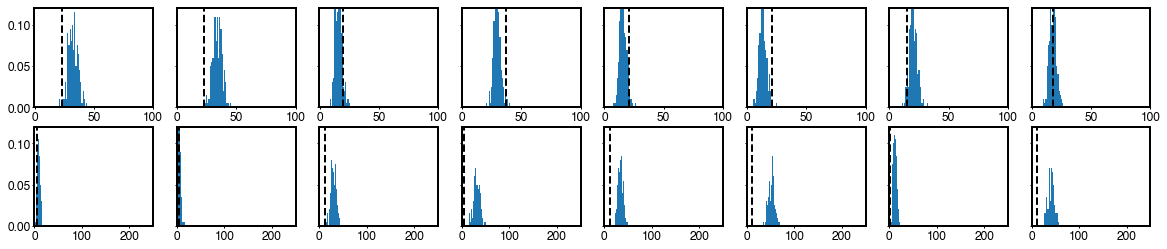

In [36]:
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
f, axs = plt.subplots(2, 8,figsize=(20, 4), sharey=True, sharex=False)
betti_num = 3
bettis = [1,2]
stims = list(bc_tavg.keys())[0:8]
my = 0
for ind, betti_num in enumerate(bettis):
    nmaxyt = 0
    nmaxxt = 0
    for stimind, stim in enumerate(stims):
        final_bettis = bc_tavg[stim][:, -1, 0]
        ax = axs[ind, stimind]
        #final_bettis = stim_betticurve_dict[stim][-1]
        b = final_bettis[betti_num]
        ax.plot([b, b], [0, 100], 'k--', linewidth=2)
        (nmaxy, nmaxx) = plot_scm_distribution([stim_scm_dict[stim]], 0, betti_num, ax=ax, align='left', histtype='stepfilled')
        nmaxyt = np.amax([nmaxy, nmaxyt])
        nmaxxt = np.amax([nmaxx, nmaxxt])
        print(final_bettis)

        if ind > 0:
            xmax = 250
            
            ax.set_xticks(np.arange(0, 300, 100))
        else:
            xmax = 100
    
        ax.set_xlim([-0.1, xmax])
        ax.set_ylim([0, 0.12])
        ax.tick_params(labelsize=12)
        for i in ax.get_xticklabels():
            i.set_fontname('helvetica')
        for i in ax.get_yticklabels():
            i.set_fontname('helvetica')
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(2)
            
        
        #ax.set_title(stim)
plt.savefig(os.path.join(figsavepth, 'SCMControl{}_bettiAll_8stims.eps'.format(bird)))